                                                                               
                                                                                










## **HEART DISEASE**


In [ ]:
import pandas as pd
a=pd.read_csv("/content/heart_disease_dataset.csv")
print(a)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

SUPPORT VECTOR MACHINE

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/heart_disease_dataset.csv")

# Split the data into features and target variable
X = data.drop(columns=['target'])
y = data['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model
model = SVC()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7049180327868853


In [ ]:
# Define a function to perform bootstrap
def bootstrap_accuracy(data, n_iterations=1000):
    accuracies = []
    for _ in range(n_iterations):
        # Resample the data with replacement
        bootstrap_sample = data.sample(n=len(data), replace=True)
        X_bootstrap = bootstrap_sample.drop(columns=['target'])
        y_bootstrap = bootstrap_sample['target']

        # Split the bootstrap sample
        X_train_bootstrap, X_test_bootstrap, y_train_bootstrap, y_test_bootstrap = train_test_split(
            X_bootstrap, y_bootstrap, test_size=0.2, random_state=42)

        # Train an SVM model
        model = SVC()
        model.fit(X_train_bootstrap, y_train_bootstrap)

        # Predict on the test set
        y_pred_bootstrap = model.predict(X_test_bootstrap)

        # Calculate accuracy and store it
        accuracy_bootstrap = accuracy_score(y_test_bootstrap, y_pred_bootstrap)
        accuracies.append(accuracy_bootstrap)

    return accuracies

# Perform bootstrap and calculate uncertainty
bootstrap_accuracies = bootstrap_accuracy(data)
uncertainty = np.std(bootstrap_accuracies)
print("Uncertainty:", uncertainty)


Uncertainty: 0.0667554007248394


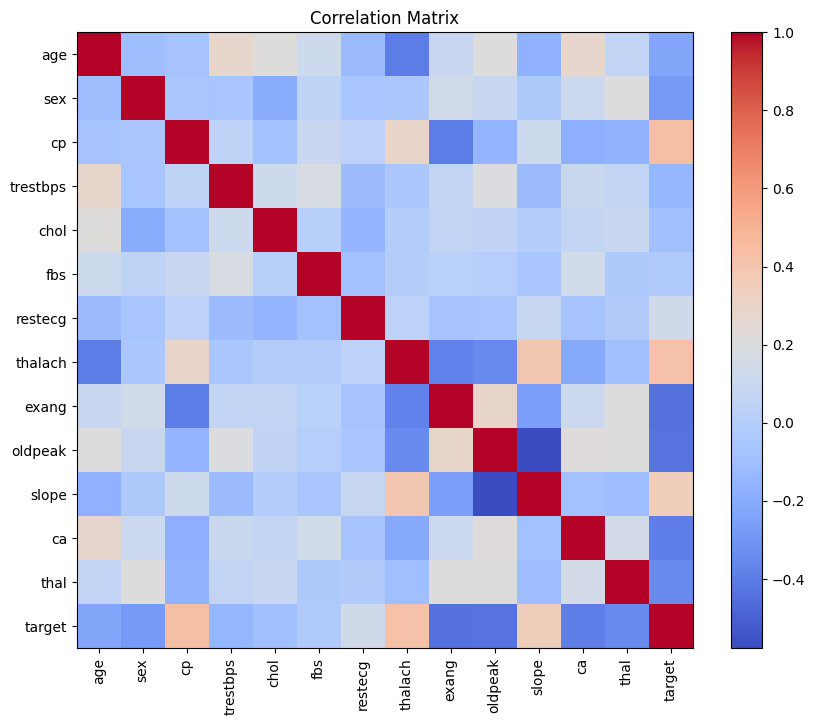

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


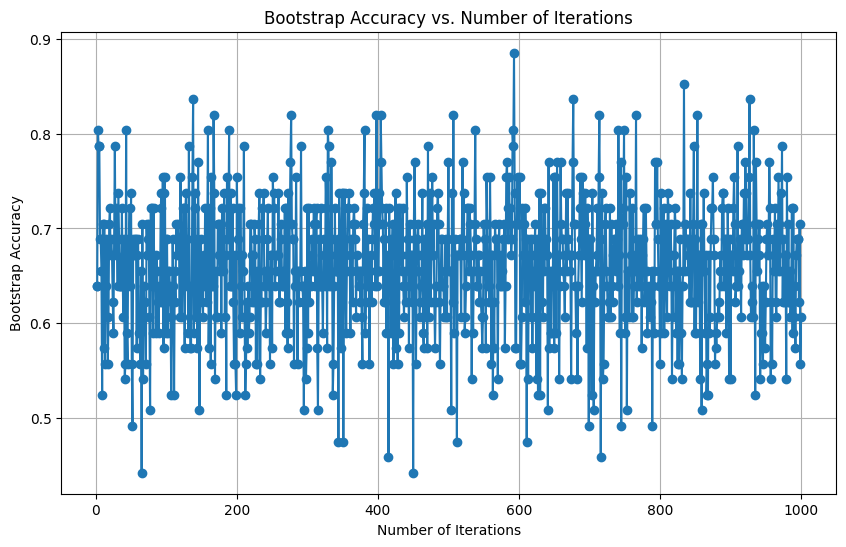

In [ ]:
# Plot Bootstrap Accuracy vs. Number of Iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(bootstrap_accuracies) + 1), bootstrap_accuracies, marker='o', linestyle='-')
plt.title('Bootstrap Accuracy vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Bootstrap Accuracy')
plt.grid(True)
plt.show()


In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[62 40]
 [25 78]]


NAVIE_BAYES ALGORITHM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/heart_disease_dataset.csv")

# Split the data into features and target variable
X = data.drop(columns=['target'])
y = data['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8688524590163934


In [ ]:
# Define a function to perform bootstrap
def bootstrap_accuracy(data, n_iterations=1000):
    accuracies = []
    for _ in range(n_iterations):
        # Resample the data with replacement
        bootstrap_sample = data.sample(n=len(data), replace=True)
        X_bootstrap = bootstrap_sample.drop(columns=['target'])
        y_bootstrap = bootstrap_sample['target']

        # Split the bootstrap sample
        X_train_bootstrap, X_test_bootstrap, y_train_bootstrap, y_test_bootstrap = train_test_split(
            X_bootstrap, y_bootstrap, test_size=0.2, random_state=42)

        # Train a Naive Bayes model
        model = GaussianNB()
        model.fit(X_train_bootstrap, y_train_bootstrap)

        # Predict on the test set
        y_pred_bootstrap = model.predict(X_test_bootstrap)

        # Calculate accuracy and store it
        accuracy_bootstrap = accuracy_score(y_test_bootstrap, y_pred_bootstrap)
        accuracies.append(accuracy_bootstrap)

    return accuracies

# Perform bootstrap and calculate uncertainty
bootstrap_accuracies = bootstrap_accuracy(data)
uncertainty = np.std(bootstrap_accuracies)
print("Uncertainty:", uncertainty)


Uncertainty: 0.05067906513647121


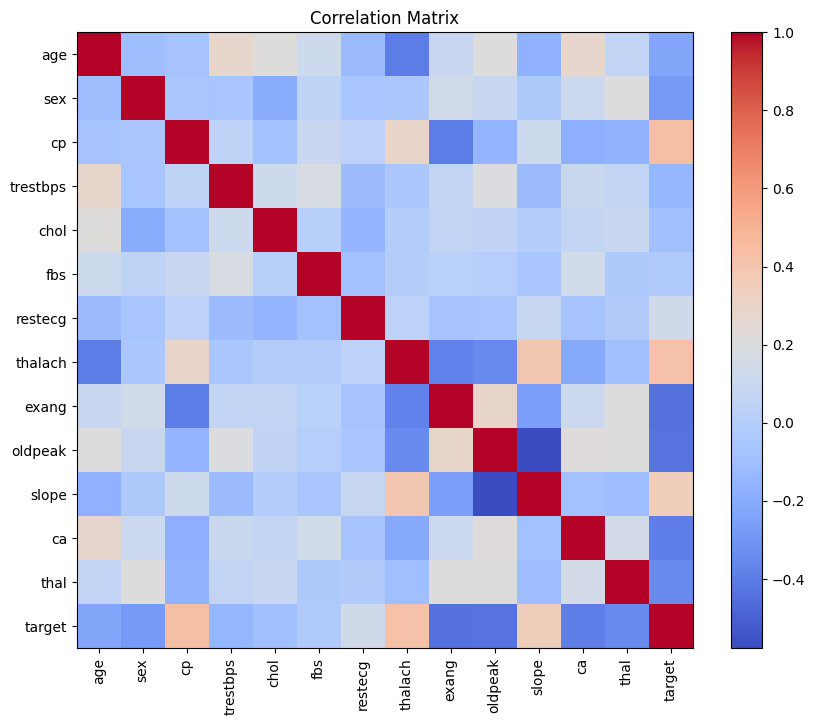

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


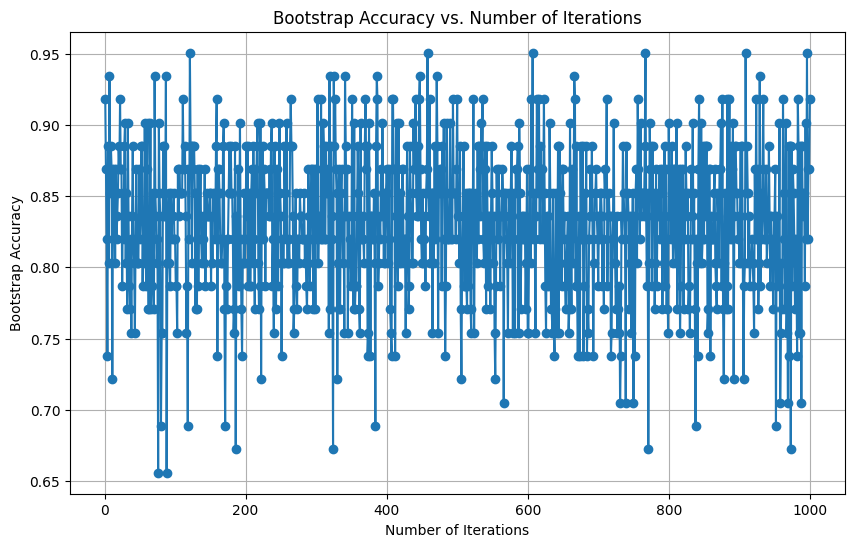

In [ ]:
# Plot Bootstrap Accuracy vs. Number of Iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(bootstrap_accuracies) + 1), bootstrap_accuracies, marker='o', linestyle='-')
plt.title('Bootstrap Accuracy vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Bootstrap Accuracy')
plt.grid(True)
plt.show()


In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[26  3]
 [ 5 27]]



Decision_Tree Classifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/heart_disease_dataset.csv")

# Split the data into features and target variable
X = data.drop(columns=['target'])
y = data['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8360655737704918


In [ ]:
# Define a function to perform bootstrap
def bootstrap_accuracy(data, n_iterations=1000):
    accuracies = []
    for _ in range(n_iterations):
        # Resample the data with replacement
        bootstrap_sample = data.sample(n=len(data), replace=True)
        X_bootstrap = bootstrap_sample.drop(columns=['target'])
        y_bootstrap = bootstrap_sample['target']

        # Split the bootstrap sample
        X_train_bootstrap, X_test_bootstrap, y_train_bootstrap, y_test_bootstrap = train_test_split(
            X_bootstrap, y_bootstrap, test_size=0.2, random_state=42)

        # Train a Decision Tree model
        model = DecisionTreeClassifier()
        model.fit(X_train_bootstrap, y_train_bootstrap)

        # Predict on the test set
        y_pred_bootstrap = model.predict(X_test_bootstrap)

        # Calculate accuracy and store it
        accuracy_bootstrap = accuracy_score(y_test_bootstrap, y_pred_bootstrap)
        accuracies.append(accuracy_bootstrap)

    return accuracies

# Perform bootstrap and calculate uncertainty
bootstrap_accuracies = bootstrap_accuracy(data)
uncertainty = np.std(bootstrap_accuracies)
print("Uncertainty:", uncertainty)


NameError: name 'data' is not defined

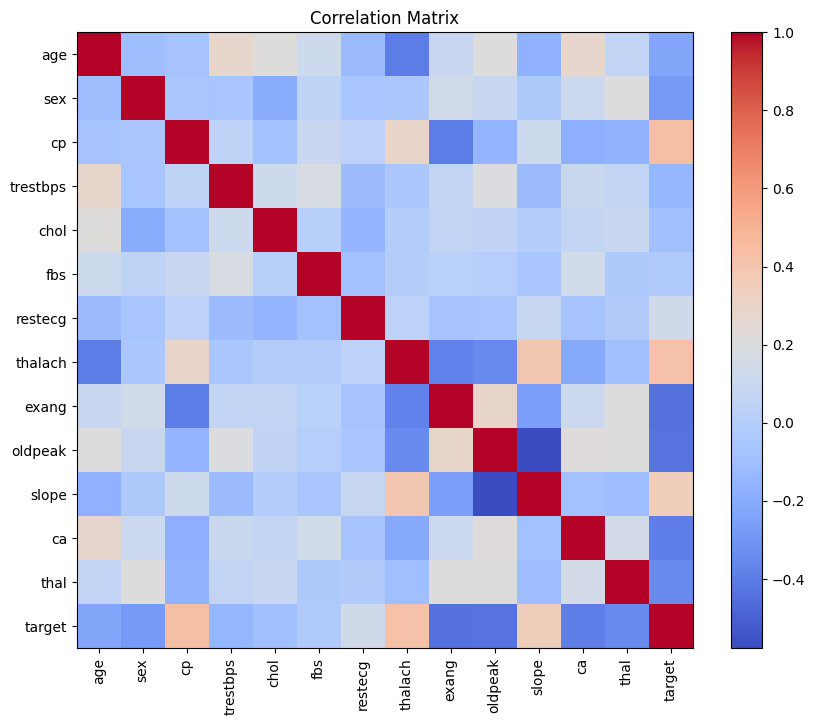

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


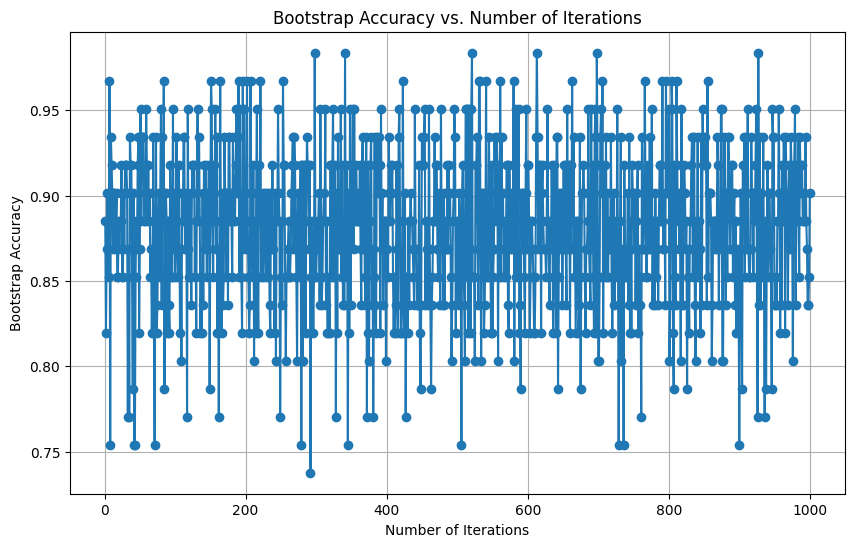

In [ ]:
# Plot Bootstrap Accuracy vs. Number of Iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(bootstrap_accuracies) + 1), bootstrap_accuracies, marker='o', linestyle='-')
plt.title('Bootstrap Accuracy vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Bootstrap Accuracy')
plt.grid(True)
plt.show()


In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[26  3]
 [ 8 24]]


multi_layer perceptron

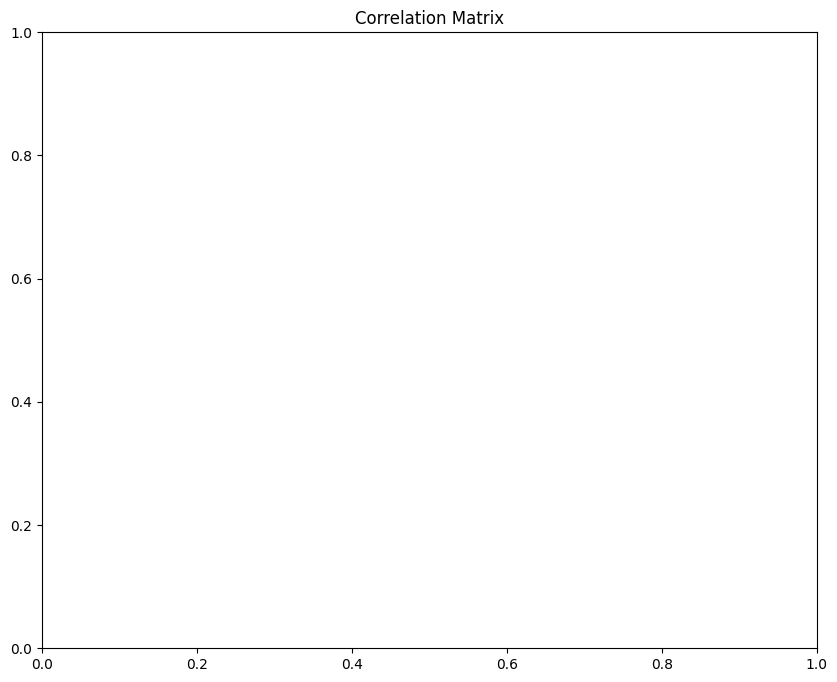

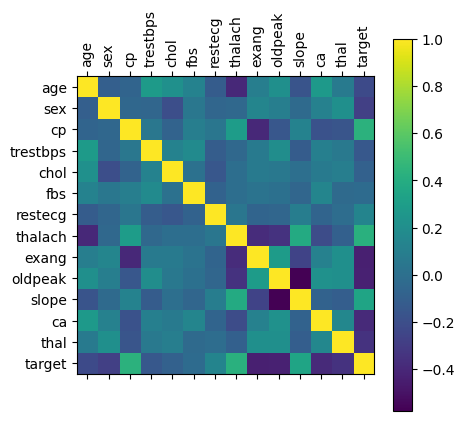

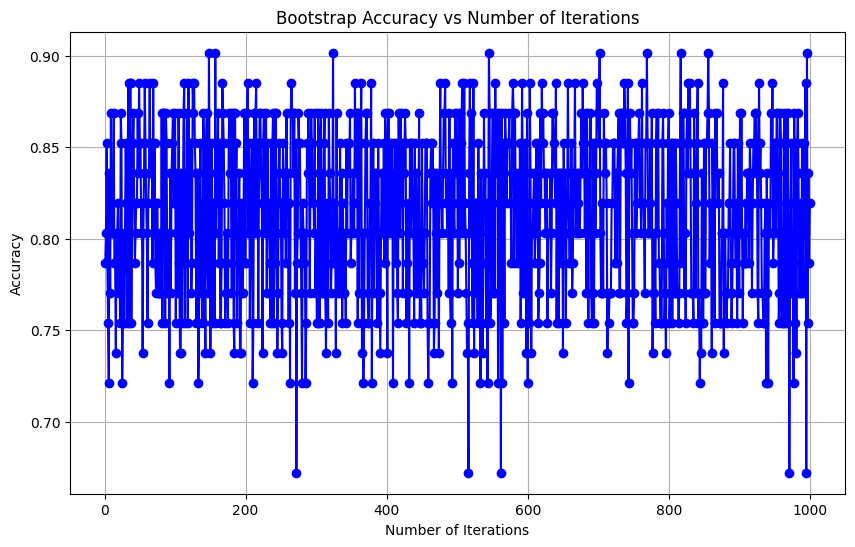

Accuracy: 0.8524590163934426
Error Rate: 0.14754098360655743


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Load dataset
data = pd.read_csv('/content/heart_disease_dataset.csv')  # Replace 'your_dataset.csv' with your dataset file path

# Split features and target
X = data.drop('target', axis=1)
y = data['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the MLP classifier
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)

# Error rate calculation
error_rate = 1 - accuracy

# Bootstrap uncertainty estimation
n_iterations = 1000
bootstrap_accuracies = []

for _ in range(n_iterations):
    X_boot, y_boot = resample(X_train, y_train, random_state=np.random.randint(100))
    mlp.fit(X_boot, y_boot)
    y_pred_boot = mlp.predict(X_test)
    bootstrap_accuracy = accuracy_score(y_test, y_pred_boot)
    bootstrap_accuracies.append(bootstrap_accuracy)

# Correlation matrix plotting
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
plt.matshow(corr_matrix, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

# Plotting bootstrap accuracy vs number of iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), bootstrap_accuracies, marker='o', linestyle='-', color='b')
plt.title('Bootstrap Accuracy vs Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)


LOGESTIC REGRESSION

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

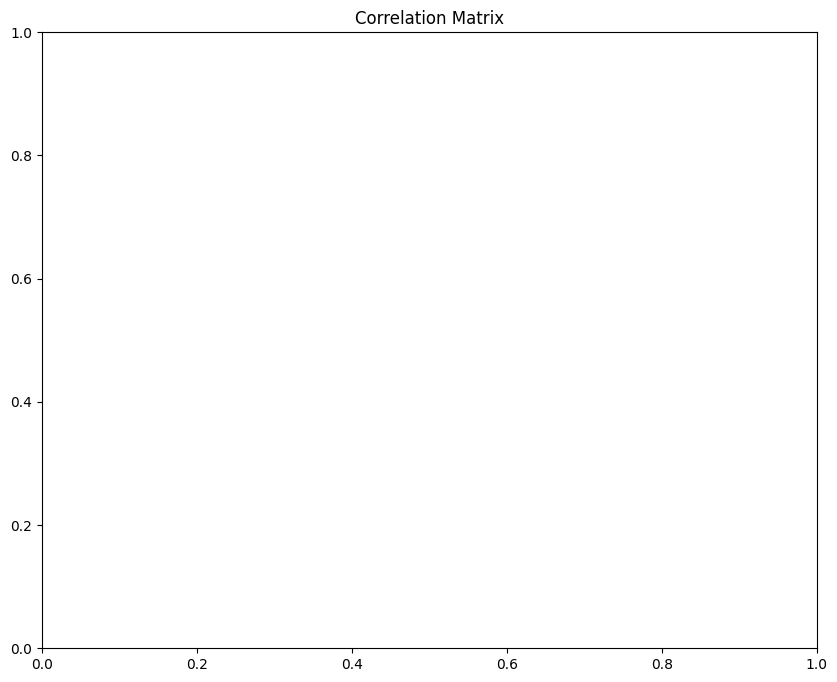

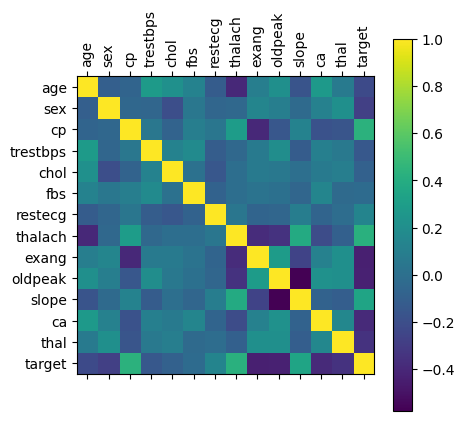

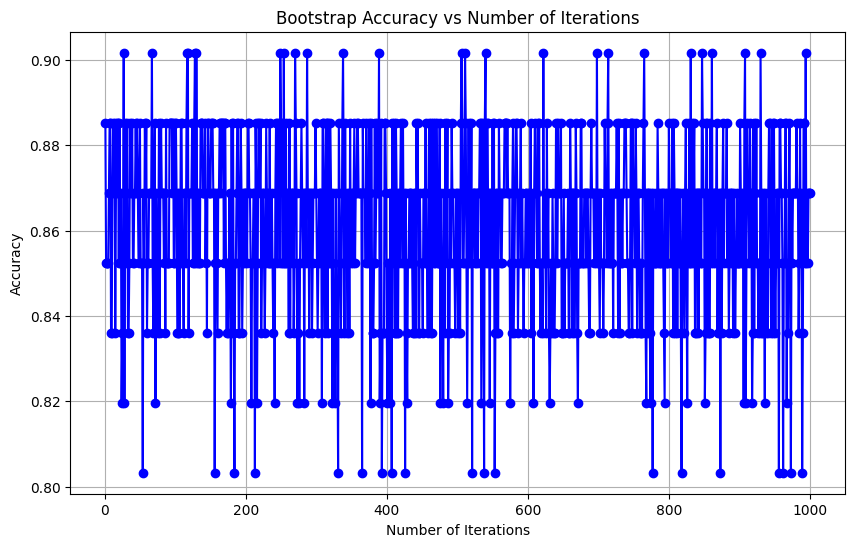

Confusion Matrix:
[[25  4]
 [ 3 29]]
Accuracy: 0.8852459016393442
Error Rate: 0.11475409836065575


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Load dataset
data = pd.read_csv('/content/heart_disease_dataset.csv')  # Replace 'your_dataset.csv' with your dataset file path

# Split features and target
X = data.drop('target', axis=1)
y = data['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression classifier
log_reg = LogisticRegression()

# Train the logistic regression classifier
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred)

# Error rate calculation
error_rate = 1 - accuracy

# Bootstrap uncertainty estimation
n_iterations = 1000
bootstrap_accuracies = []

for _ in range(n_iterations):
    X_boot, y_boot = resample(X_train, y_train, random_state=np.random.randint(100))
    log_reg.fit(X_boot, y_boot)
    y_pred_boot = log_reg.predict(X_test)
    bootstrap_accuracy = accuracy_score(y_test, y_pred_boot)
    bootstrap_accuracies.append(bootstrap_accuracy)

# Correlation matrix plotting
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
plt.matshow(corr_matrix, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

# Plotting bootstrap accuracy vs number of iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), bootstrap_accuracies, marker='o', linestyle='-', color='b')
plt.title('Bootstrap Accuracy vs Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
